# Sales Prediction

- The dataset contains weekly sales from 99 departments belonging to 45 different stores. 
- Aim is to forecast weekly sales from a particular department.
- The objective of this case study is to forecast weekly retail store sales based on historical data.
- The data consists of three sheets: 
    - Stores
    - Features
    - Sales
- Data Source : https://www.kaggle.com/manjeetsingh/retaildataset

# Importing Dataset And Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [4]:
feature = pd.read_csv('Features_data_set.csv')
sales = pd.read_csv('sales_data_set.csv')
stores = pd.read_csv('stores_data_set.csv')

In [5]:
stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [6]:
# Features dataframe contains additional data related to the store, department, and regional activity for the given dates.
# Store: store number
# Date: week
# Temperature: average temperature in the region
# Fuel_Price: cost of fuel in the region
# MarkDown1-5: anonymized data related to promotional markdowns. 
# CPI: consumer price index
# Unemployment: unemployment rate
# IsHoliday: whether the week is a special holiday week or not
feature

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [7]:
# "Sales" dataframe contains historical sales data, which covers 2010-02-05 to 2012-11-01. 
# Store: store number
# Dept: department number
# Date: the week
# Weekly_Sales: sales for the given department in the given store
# IsHoliday: whether the week is a special holiday week

sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


# Exploring Individual Dataset

In [8]:
stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [9]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [10]:
sales.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [11]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [12]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [13]:
feature.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [14]:
feature['Date'] = pd.to_datetime(feature['Date'], dayfirst=True)
sales['Date'] = pd.to_datetime(sales['Date'], dayfirst=True)

In [15]:
feature

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [16]:
sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


# Merging All Three Dataframes

In [17]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [18]:
feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [19]:
df = pd.merge(sales, feature, on = ['Store','Date','IsHoliday'])

In [20]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667


In [21]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [22]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [23]:
df = pd.merge(df, stores, on = ['Store'], how = 'left')

In [24]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [25]:
def get_month(x):
    return int(str(x).split('-')[1])

In [26]:
df['month'] = df['Date'].apply(get_month)

In [27]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,month
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10


# Exploring Merged Dataset

In [28]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
month                0
dtype: int64

In [29]:
df = df.fillna(0)

In [30]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,month
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,2
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,2
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,2
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,2
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10


In [31]:
df.describe()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,month
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375360,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,136727.915739,6.449510
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000,1.000000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000,4.000000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000,6.000000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000,9.000000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,12.000000
std,12.785297,30.492054,NaN,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,60980.583328,3.243217


In [32]:
df.duplicated().sum()

0

In [33]:
df['Type'].value_counts()

Type
A    215478
B    163495
C     42597
Name: count, dtype: int64

In [34]:
df['IsHoliday'] = df['IsHoliday'].replace({True : 1, False: 0})

In [35]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,month
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,2
1,1,2,2010-02-05,50605.27,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,2
2,1,3,2010-02-05,13740.12,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,2
3,1,4,2010-02-05,39954.04,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,2
4,1,5,2010-02-05,32229.38,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10
421566,45,94,2012-10-26,5203.31,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10
421567,45,95,2012-10-26,56017.47,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10
421568,45,97,2012-10-26,6817.48,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10


# Exploratory Data Analysis

In [36]:
result = pd.pivot_table(df, values = 'Weekly_Sales', columns = ['Type'], index = ['Date', 'Store', 'Dept'],
                    aggfunc= "mean")

In [37]:
result

Type                          A         B   C
Date       Store Dept                        
2010-02-05 1     1     24924.50       NaN NaN
                 2     50605.27       NaN NaN
                 3     13740.12       NaN NaN
                 4     39954.04       NaN NaN
                 5     32229.38       NaN NaN
...                         ...       ...  ..
2012-10-26 45    93         NaN   2487.80 NaN
                 94         NaN   5203.31 NaN
                 95         NaN  56017.47 NaN
                 97         NaN   6817.48 NaN
                 98         NaN   1076.80 NaN

[421570 rows x 3 columns]

In [38]:
result.describe()
# It can be seen that Type A stores have much higher sales than Type B and Type C

Type,A,B,C
count,215478.000000,163495.000000,42597.000000
mean,20099.568043,12237.075977,9519.532538
std,26423.457227,17203.668989,15985.351612
min,-4988.940000,-3924.000000,-379.000000
25%,3315.090000,1927.055000,131.990000
50%,10105.170000,6187.870000,1149.670000
75%,26357.180000,15353.740000,12695.010000
max,474330.100000,693099.360000,112152.350000


In [39]:

result_md = pd.pivot_table(df, values = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], columns = ['IsHoliday'], index = ['Date', 'Store','Dept'],
                    aggfunc={'MarkDown1' : "mean",'MarkDown2' : "mean", 'MarkDown3' :"mean", 'MarkDown4' : "mean", 'MarkDown5' : "mean"})

In [40]:
result_md

MarkDown1     MarkDown2     MarkDown3     MarkDown4      \
IsHoliday                     0   1         0   1         0   1         0   1   
Date       Store Dept                                                           
2010-02-05 1     1         0.00 NaN      0.00 NaN       0.0 NaN      0.00 NaN   
                 2         0.00 NaN      0.00 NaN       0.0 NaN      0.00 NaN   
                 3         0.00 NaN      0.00 NaN       0.0 NaN      0.00 NaN   
                 4         0.00 NaN      0.00 NaN       0.0 NaN      0.00 NaN   
                 5         0.00 NaN      0.00 NaN       0.0 NaN      0.00 NaN   
...                         ...  ..       ...  ..       ...  ..       ...  ..   
2012-10-26 45    93     4018.91 NaN     58.08 NaN     100.0 NaN    211.94 NaN   
                 94     4018.91 NaN     58.08 NaN     100.0 NaN    211.94 NaN   
                 95     4018.91 NaN     58.08 NaN     100.0 NaN    211.94 NaN   
                 97     4018.91 NaN     58.08 NaN     100.0 NaN    211.94 NaN   
                 98     4018.91 NaN     58.08 NaN     100.0 NaN    211.94 NaN   

                      MarkDown5      
IsHoliday                     0   1  
Date       Store Dept                
2010-02-05 1     1         0.00 NaN  
                 2         0.00 NaN  
                 3         0.00 NaN  
                 4         0.00 NaN  
                 5         0.00 NaN  
...                         ...  ..  
2012-10-26 45    93      858.33 NaN  
                 94      858.33 NaN  
                 95      858.33 NaN  
                 97      858.33 NaN  
                 98      858.33 NaN  

[421570 rows x 10 columns]

In [41]:
result_md.sum()

           IsHoliday
MarkDown1  0            1.017371e+09
           1            7.452684e+07
MarkDown2  0            2.310619e+08
           1            1.399088e+08
MarkDown3  0            2.460332e+07
           1            1.727284e+08
MarkDown4  0            4.196331e+08
           1            3.698298e+07
MarkDown5  0            6.585670e+08
           1            4.240793e+07
dtype: float64

In [42]:
result_md.describe()
# we can conclude that MarkDown2 and MarkDown3 have higher volume on holidays compared to that of regular days 
# while other MarkDowns don't show significant changes relating to holiday.

MarkDown1                    MarkDown2                 \
IsHoliday              0             1              0              1   
count      391909.000000  29661.000000  391909.000000   29661.000000   
mean         2595.936803   2512.620778     589.580546    4716.929394   
std          6123.402037   5020.047408    2984.163111   15295.329993   
min             0.000000      0.000000    -265.760000      -9.980000   
25%             0.000000      0.000000       0.000000       0.000000   
50%             0.000000      0.000000       0.000000       0.000000   
75%          2826.570000   2463.160000       0.500000      65.000000   
max         88646.760000  36778.650000   45971.430000  104519.540000   

               MarkDown3                     MarkDown4                \
IsHoliday              0              1              0             1   
count      391909.000000   29661.000000  391909.000000  29661.000000   
mean           62.778142    5823.417900    1070.741151   1246.855336   
std           630.704594   19959.302249    3921.553070   3513.998030   
min           -29.100000       0.000000       0.000000      0.000000   
25%             0.000000       0.000000       0.000000      0.000000   
50%             0.000000       0.000000       0.000000      0.000000   
75%             3.840000      66.080000     442.390000    319.190000   
max         25959.980000  141630.610000   67474.850000  29483.810000   

               MarkDown5                
IsHoliday              0             1  
count      391909.000000  29661.000000  
mean         1680.408001   1429.754053  
std          4312.031598   2427.638027  
min             0.000000      0.000000  
25%             0.000000      0.000000  
50%             0.000000      0.000000  
75%          2182.320000   2069.300000  
max        108519.280000  11100.550000

In [43]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_columns].corr()

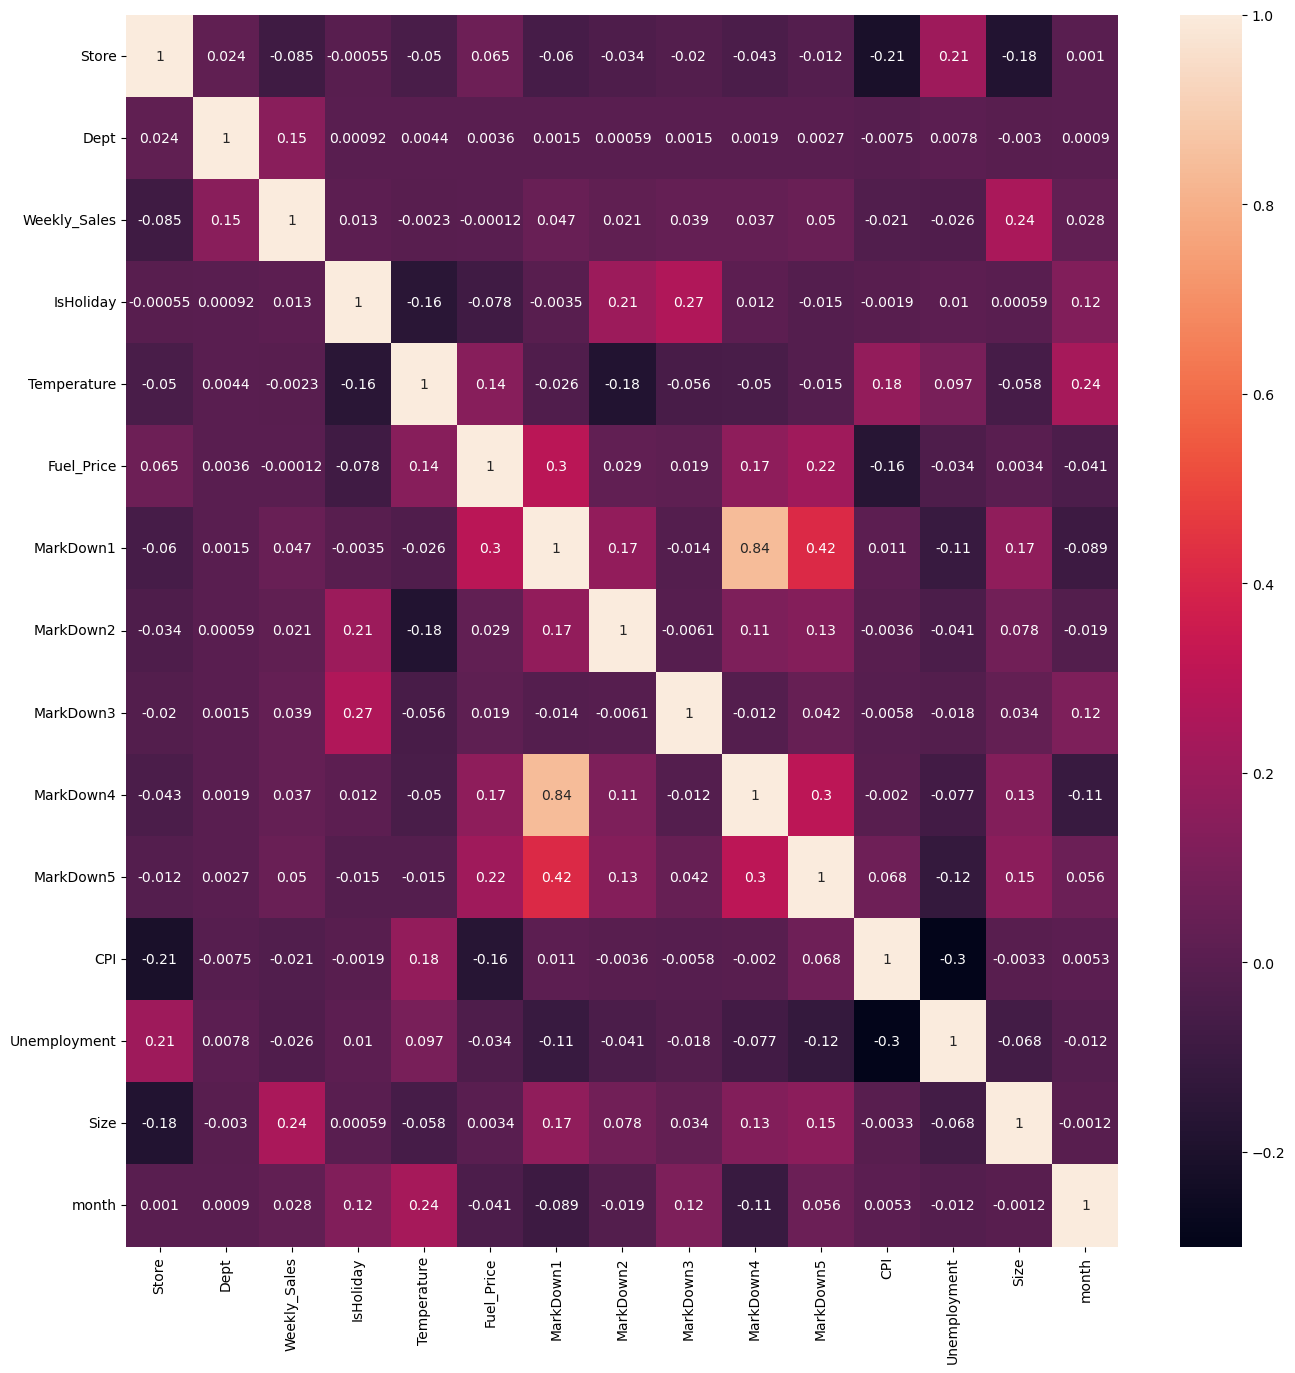

In [44]:
plt.figure(figsize = (16,16))
sns.heatmap(corr_matrix, annot = True)
plt.show()

# Data Visualization

In [45]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,month
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,2
1,1,2,2010-02-05,50605.27,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,2
2,1,3,2010-02-05,13740.12,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,2
3,1,4,2010-02-05,39954.04,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,2
4,1,5,2010-02-05,32229.38,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10
421566,45,94,2012-10-26,5203.31,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10
421567,45,95,2012-10-26,56017.47,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10
421568,45,97,2012-10-26,6817.48,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10


array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'Dept'}>,
        <Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Weekly_Sales'}>],
       [<Axes: title={'center': 'IsHoliday'}>,
        <Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Fuel_Price'}>,
        <Axes: title={'center': 'MarkDown1'}>],
       [<Axes: title={'center': 'MarkDown2'}>,
        <Axes: title={'center': 'MarkDown3'}>,
        <Axes: title={'center': 'MarkDown4'}>,
        <Axes: title={'center': 'MarkDown5'}>],
       [<Axes: title={'center': 'CPI'}>,
        <Axes: title={'center': 'Unemployment'}>,
        <Axes: title={'center': 'Size'}>,
        <Axes: title={'center': 'month'}>]], dtype=object)

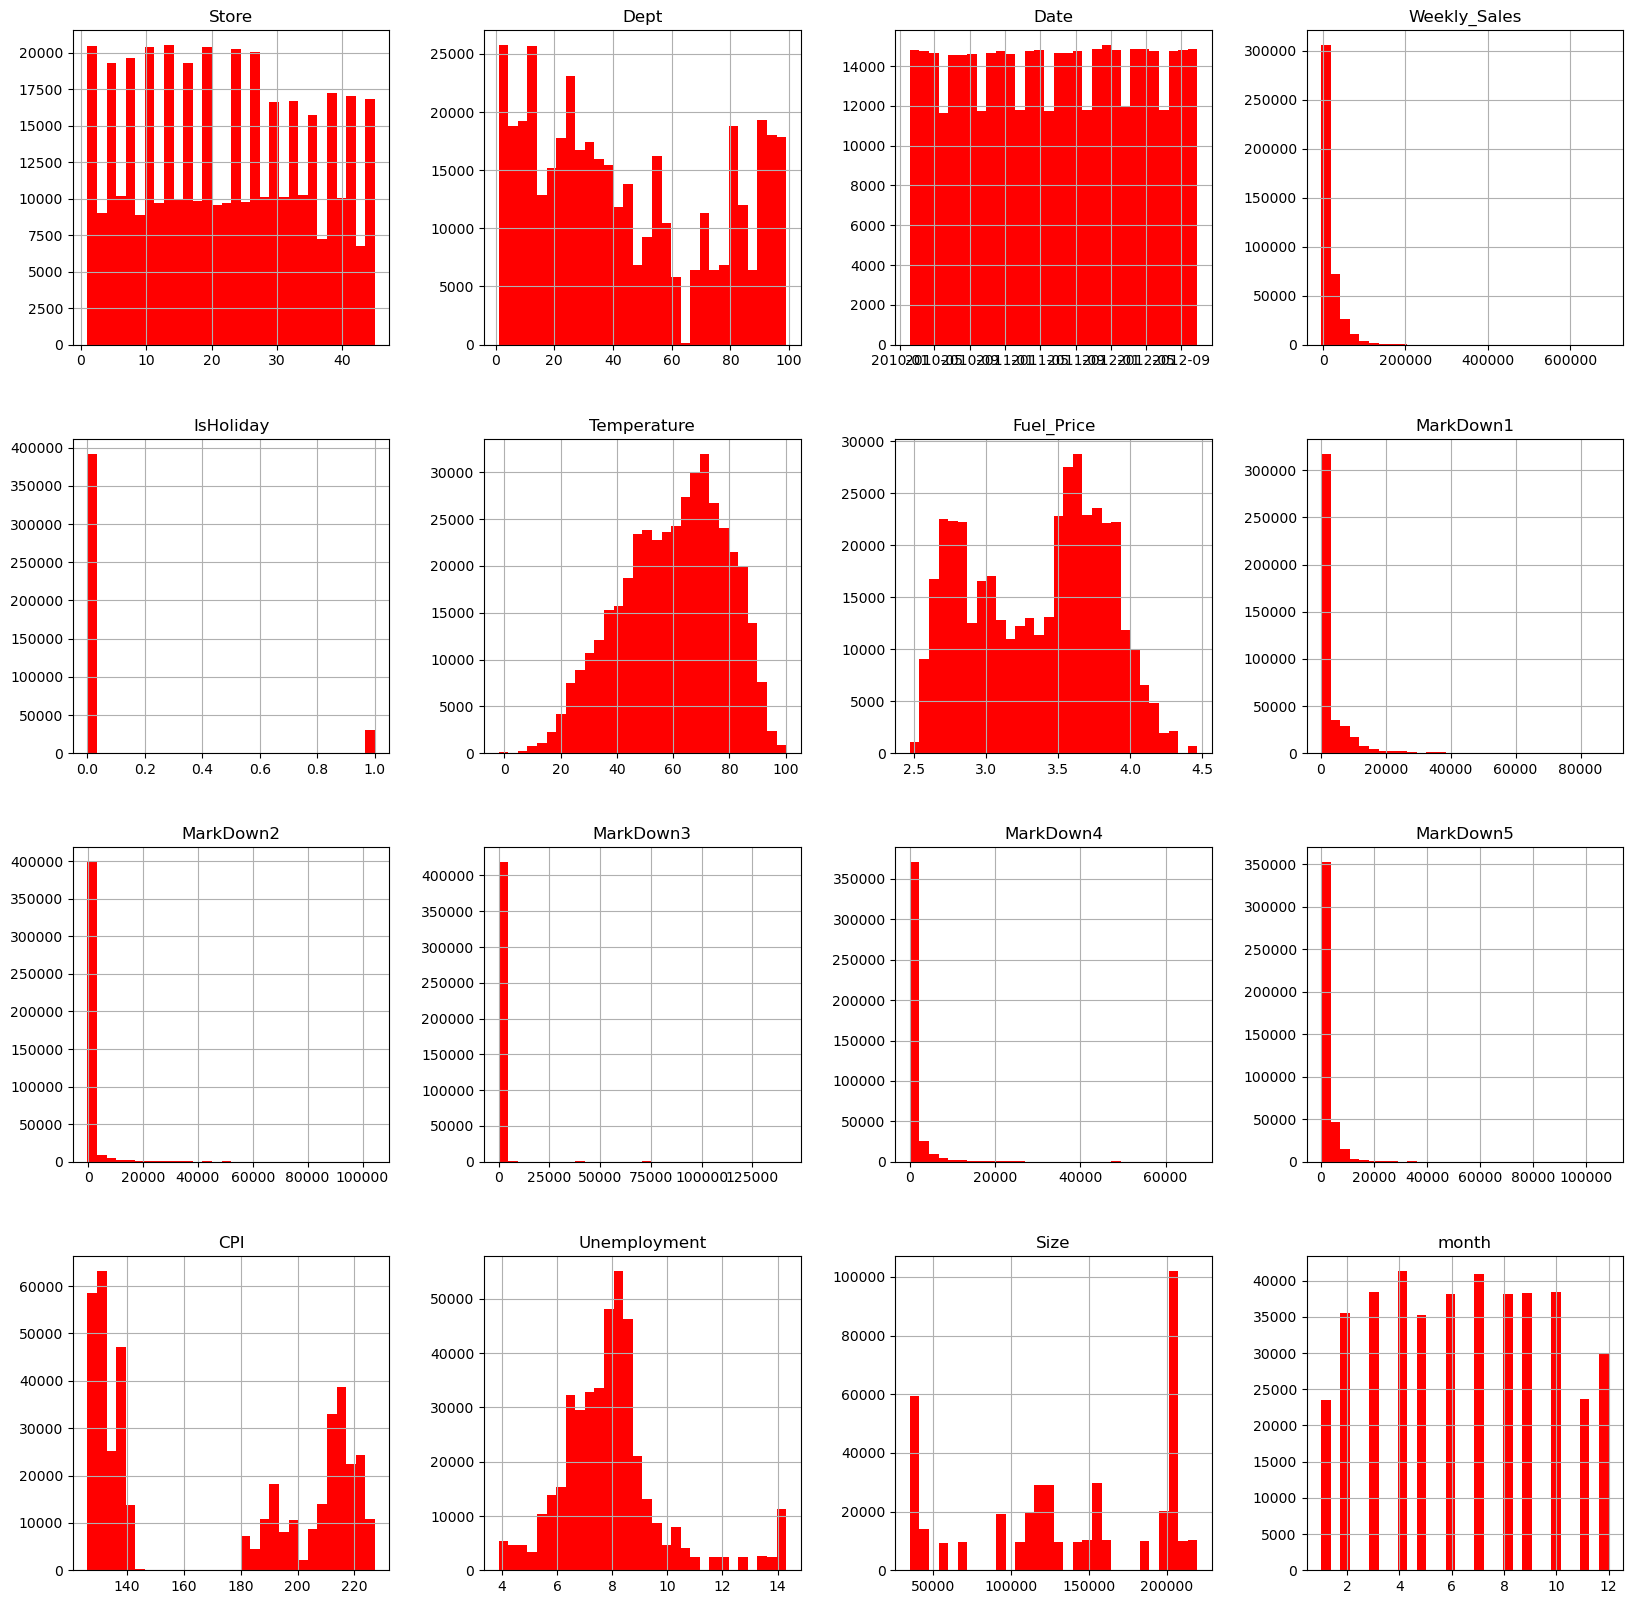

In [46]:
df.hist(bins = 30, figsize = (20,20), color = 'r')


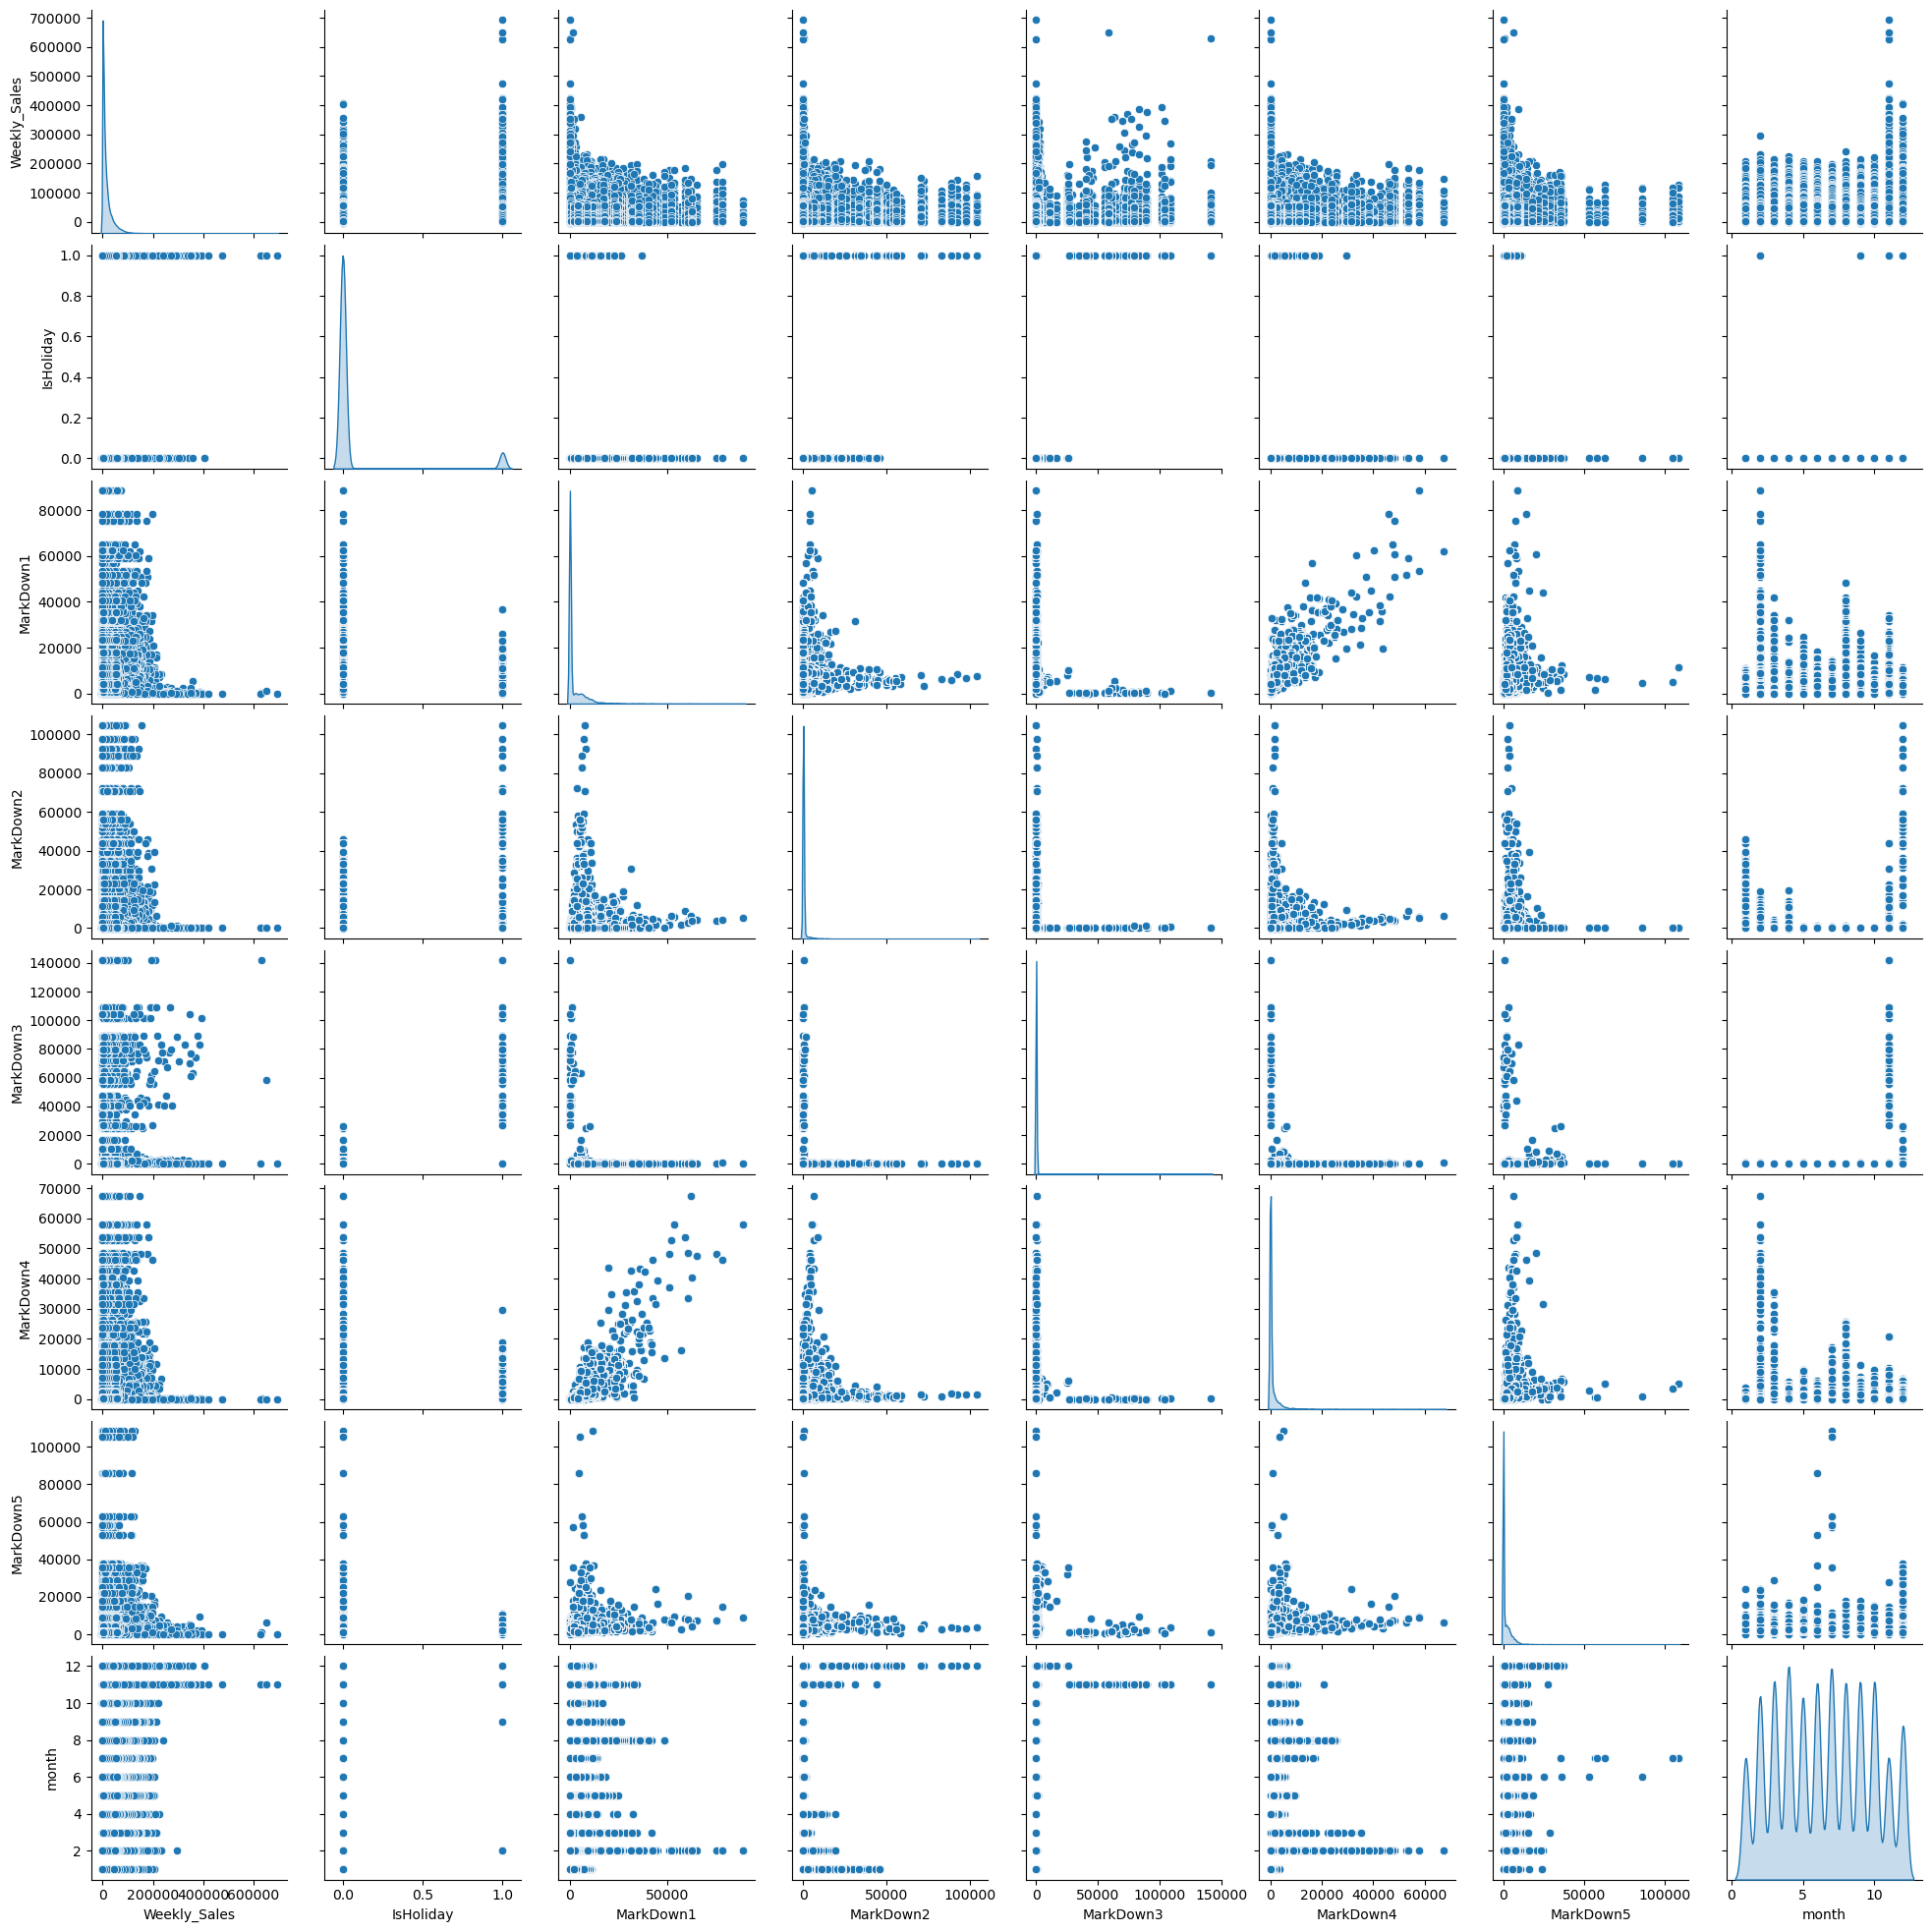

In [47]:
# visualizing the relationship using pairplots
# there is a relationship between markdown #1 and Markdown #4
# holiday and sales 
# Weekly sales and markdown #3
sns.pairplot(df[["Weekly_Sales","IsHoliday","MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5","Type","month"]], diag_kind = "kde")

In [48]:
df_type = df.groupby('Type').mean()

In [49]:
df_type

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,month
Type,,,,,,,,,,,,,,,,
A,21.736419,44.622156,2011-06-17 15:46:40.868766208,20099.568043,0.070471,60.531945,3.343999,3102.403194,1083.216159,549.644930,1325.891281,2147.830168,174.408895,7.791595,182231.285486,6.449628
B,18.450417,43.112273,2011-06-18 02:17:20.222636800,12237.075977,0.070412,57.562951,3.382523,2553.465968,827.500452,481.215226,1043.927675,1324.921913,167.176656,7.928836,101818.735827,6.449586
C,38.942015,46.836350,2011-06-22 21:00:56.032114944,9519.532538,0.069582,67.554266,3.364654,138.960203,53.274338,5.142226,5.603993,505.826631,170.429314,8.934350,40535.725286,6.448623


<Axes: xlabel='Type', ylabel='Weekly_Sales'>

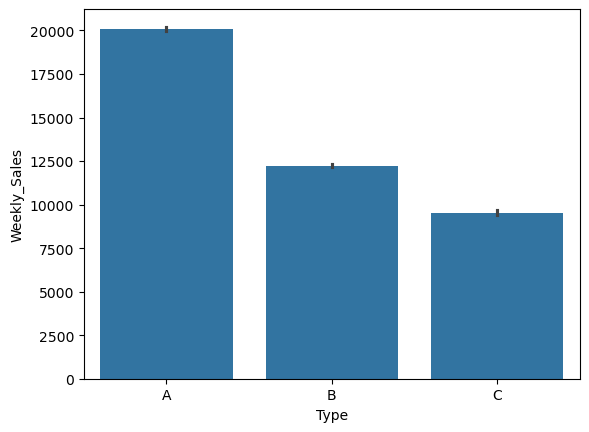

In [50]:
sns.barplot(x = df['Type'], y = df['Weekly_Sales'], data = df)

In [51]:
df_dept = df.drop(columns = ['Store','Type','IsHoliday','Temperature','Fuel_Price','CPI','Unemployment','Size','month'])
# df_dept = df.groupby('Dept').mean()
df_dept

,Dept,Date,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,1,2010-02-05,24924.50,0.00,0.00,0.0,0.00,0.00
1,2,2010-02-05,50605.27,0.00,0.00,0.0,0.00,0.00
2,3,2010-02-05,13740.12,0.00,0.00,0.0,0.00,0.00
3,4,2010-02-05,39954.04,0.00,0.00,0.0,0.00,0.00
4,5,2010-02-05,32229.38,0.00,0.00,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...
421565,93,2012-10-26,2487.80,4018.91,58.08,100.0,211.94,858.33
421566,94,2012-10-26,5203.31,4018.91,58.08,100.0,211.94,858.33
421567,95,2012-10-26,56017.47,4018.91,58.08,100.0,211.94,858.33
421568,97,2012-10-26,6817.48,4018.91,58.08,100.0,211.94,858.33


# Data Preparation

In [45]:
df_target = df['Weekly_Sales']
df_final = df.drop(columns = ['Weekly_Sales', 'Date'])

In [46]:
df_final = pd.get_dummies(df_final, columns = ['Type', 'Store', 'Dept'], drop_first = True)

In [47]:
df_final.shape

(421570, 138)

In [48]:
df_target.shape

(421570,)

In [49]:
df_final

,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99
0,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,...,False,False,False,False,False,False,False,False,False,False
1,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,...,False,False,False,False,False,False,False,False,False,False
2,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,...,False,False,False,False,False,False,False,False,False,False
3,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,...,False,False,False,False,False,False,False,False,False,False
4,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,...,False,False,False,True,False,False,False,False,False,False
421566,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,...,False,False,False,False,True,False,False,False,False,False
421567,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,...,False,False,False,False,False,True,False,False,False,False
421568,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,...,False,False,False,False,False,False,False,True,False,False


In [50]:
X = np.array(df_final).astype('float32')
y = np.array(df_target).astype('float32')

In [51]:
# reshaping the array from (421570,) to (421570, 1)
y = y.reshape(-1,1)
y.shape

(421570, 1)

In [52]:
# scaling the data before feeding the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [53]:
# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)


In [54]:
X_train

array([[-0.27510616, -0.5464066 , -0.34464914, ..., -0.12295151,
        -0.11848132, -0.04526507],
       [-0.27510616,  1.1242435 ,  0.92684954, ..., -0.12295151,
        -0.11848132, -0.04526507],
       [ 3.634961  , -0.72041005, -0.50604033, ..., -0.12295151,
        -0.11848132, -0.04526507],
       ...,
       [-0.27510616, -1.1627367 ,  0.8156204 , ...,  8.133287  ,
        -0.11848132, -0.04526507],
       [-0.27510616, -0.49491024, -0.9291463 , ..., -0.12295151,
        -0.11848132, -0.04526507],
       [-0.27510616, -2.1525507 ,  0.03701849, ..., -0.12295151,
        -0.11848132, -0.04526507]], dtype=float32)

# Training XGBoost Regressor

In [55]:
!pip install xgboost

In [56]:
import xgboost as xgb

model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 5, n_estimators = 100)

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [57]:
result = model.score(X_test, y_test)

print("Accuracy : {}".format(result))

Accuracy : 0.8073573808010209


In [58]:
y_predict = model.predict(X_test)

In [59]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 0.448 
MSE = 0.20049469 
MAE = 0.2869984 
R2 = 0.8073573808010209 
Adjusted R2 = 0.8065128596456647


In [60]:
model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 10, n_estimators = 100)

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [61]:
result = model.score(X_test, y_test)

print("Accuracy : {}".format(result))

Accuracy : 0.9190083278404806


In [62]:
y_predict = model.predict(X_test)

In [63]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 0.29 
MSE = 0.08429289 
MAE = 0.17307845 
R2 = 0.9190083278404806 
Adjusted R2 = 0.9186532704765867


# Training XGBoost Using Sagemaker

In [66]:
# Converting the array into dataframe in a way that target variable is set as the first column and followed by feature columns
train_data = pd.DataFrame({'Target': y_train[:,0]})
for i in range(X_train.shape[1]):
    train_data[i] = X_train[:,i]

/tmp/ipykernel_31144/1915584433.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_data[i] = X_train[:,i]
/tmp/ipykernel_31144/1915584433.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_data[i] = X_train[:,i]
/tmp/ipykernel_31144/1915584433.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.c

In [70]:
train_data.head()

,Target,0,1,2,3,4,5,6,7,8,...,128,129,130,131,132,133,134,135,136,137
0,-0.694038,-0.275106,-0.546407,-0.344649,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,-1.134050,...,-0.124503,-0.124503,-0.124503,-0.119271,-0.116917,-0.124503,-0.107927,-0.122952,-0.118481,-0.045265
1,-0.396919,-0.275106,1.124243,0.926850,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.170924,...,-0.124503,-0.124503,-0.124503,-0.119271,-0.116917,-0.124503,-0.107927,-0.122952,-0.118481,-0.045265
2,-0.333174,3.634961,-0.720410,-0.506040,0.579684,16.127575,-0.025576,-0.068956,0.253401,1.274957,...,-0.124503,-0.124503,-0.124503,-0.119271,-0.116917,-0.124503,-0.107927,-0.122952,-0.118481,-0.045265
3,-0.505455,-0.275106,0.005417,1.112231,1.327606,-0.115561,-0.075265,0.430601,1.082983,-0.844872,...,-0.124503,-0.124503,-0.124503,-0.119271,-0.116917,-0.124503,-0.107927,-0.122952,-0.118481,-0.045265
4,-0.156368,-0.275106,0.023306,0.977012,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,-0.890913,...,-0.124503,-0.124503,-0.124503,-0.119271,-0.116917,-0.124503,-0.107927,-0.122952,-0.118481,-0.045265


In [71]:
val_data = pd.DataFrame({'Target':y_val[:,0]})
for i in range(X_val.shape[1]):
    val_data[i] = X_val[:,i]

/tmp/ipykernel_31144/565076207.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_data[i] = X_val[:,i]
/tmp/ipykernel_31144/565076207.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_data[i] = X_val[:,i]
/tmp/ipykernel_31144/565076207.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  va

In [72]:
val_data.head()

,Target,0,1,2,3,4,5,6,7,8,...,128,129,130,131,132,133,134,135,136,137
0,-0.266615,-0.275106,0.887902,0.979192,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.102068,...,-0.124503,-0.124503,-0.124503,-0.119271,-0.116917,-0.124503,-0.107927,-0.122952,-0.118481,-0.045265
1,-0.248414,-0.275106,1.603430,-0.663069,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,-1.151454,...,-0.124503,-0.124503,-0.124503,-0.119271,-0.116917,-0.124503,-0.107927,-0.122952,-0.118481,-0.045265
2,-0.130307,-0.275106,0.472137,0.915945,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,-1.078843,...,-0.124503,-0.124503,-0.124503,-0.119271,-0.116917,-0.124503,-0.107927,-0.122952,-0.118481,-0.045265
3,-0.445034,-0.275106,0.261815,0.789449,0.716560,-0.055261,-0.083639,0.594067,0.624625,0.676478,...,-0.124503,-0.124503,-0.124503,-0.119271,-0.116917,-0.124503,-0.107927,-0.122952,-0.118481,-0.045265
4,-0.695150,-0.275106,1.467914,-1.642320,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,1.013559,...,-0.124503,-0.124503,-0.124503,-0.119271,-0.116917,-0.124503,-0.107927,-0.122952,-0.118481,-0.045265


In [73]:
val_data.shape

(31618, 139)

In [74]:
train_data.to_csv('train.csv', header = False, index = False)
val_data.to_csv('validation.csv', header = False, index = False)

In [78]:
import sagemaker
import boto3

bucket = 'sales-prediction-akshat'
# Creating a sagemaker session
sagemaker_session = sagemaker.Session(default_bucket=bucket)

#S3 bucket and prefix 
prefix = 'XGBoost-Regressor'
key = 'XGBoost-Regressor'
#Roles give learning and hosting access to the data
#This is specified while opening the sagemakers instance in "Create an IAM role"
role = sagemaker.get_execution_role()

In [79]:
print(role)

arn:aws:iam::767397997314:role/service-role/AmazonSageMaker-ExecutionRole-20240203T140685


In [80]:
# uploading the data to s3 bucket
import os
with open('train.csv','rb') as f:
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(f)

# printing out the training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://sales-prediction-akshat/XGBoost-Regressor/train/XGBoost-Regressor


In [81]:
with open('validation.csv','rb') as f:
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'validation', key)).upload_fileobj(f)

# printing out the validation data location in s3
s3_validation_data = 's3://{}/{}/validation/{}'.format(bucket, prefix, key)
print('uploaded validation data location: {}'.format(s3_validation_data))

uploaded validation data location: s3://sales-prediction-akshat/XGBoost-Regressor/validation/XGBoost-Regressor


In [82]:
# createing output placeholder in S3 bucket to store the output

output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('training artifacts will be uploaded to: {}'.format(output_location))

training artifacts will be uploaded to: s3://sales-prediction-akshat/XGBoost-Regressor/output


In [83]:
# This code is used to get the training container of sagemaker built-in algorithms
from sagemaker.amazon.amazon_estimator import get_image_uri

container = get_image_uri(boto3.Session().region_name, 'xgboost','0.90-2') # Latest version of XGboost

The method get_image_uri has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [84]:
# Specifying the type of instance that we would like to use for training output path and sagemaker session into the Estimator. 

# XGBoost works by combining an ensemble of weak models to generate accurate/robust results. 
# The weak models are randomized to avoid overfitting

# num_round: The number of rounds to run the training.


# Alpha: L1 regularization term on weights. Increasing this value makes models more conservative.

# colsample_by_tree: fraction of features that will be used to train each tree.

# eta: Step size shrinkage used in updates to prevent overfitting. 
# After each boosting step, eta parameter shrinks the feature weights to make the boosting process more conservative.


Xgboost_regressor1 = sagemaker.estimator.Estimator(container,
                                       role, 
                                       train_instance_count = 1, 
                                       train_instance_type = 'ml.m5.2xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session)


Xgboost_regressor1.set_hyperparameters(max_depth = 10,
                           objective = 'reg:linear',
                           colsample_bytree = 0.3,
                           alpha = 10,
                           eta = 0.1,
                           num_round = 100
                           )



train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [85]:
# Creating "train", "validation" channels to feed in the model
# Source: https://docs.aws.amazon.com/sagemaker/latest/dg/sagemaker-algo-docker-registry-paths.html

train_input = sagemaker.session.s3_input(s3_data = s3_train_data, content_type='csv',s3_data_type = 'S3Prefix')
valid_input = sagemaker.session.s3_input(s3_data = s3_validation_data, content_type='csv',s3_data_type = 'S3Prefix')


data_channels = {'train': train_input,'validation': valid_input}


Xgboost_regressor1.fit(data_channels)

The class sagemaker.session.s3_input has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
The class sagemaker.session.s3_input has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
INFO:sagemaker:Creating training-job with name: sagemaker-xgboost-2024-02-03-11-09-13-642


2024-02-03 11:09:13 Starting - Starting the training job...
2024-02-03 11:09:35 Starting - Preparing the instances for training......
2024-02-03 11:10:28 Downloading - Downloading input data...
2024-02-03 11:11:08 Training - Training image download completed. Training in progress...INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value reg:linear to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
[11:11:24] 358334x138 matrix with 49450092 entries loaded from /opt/ml/input/data/train?format=csv&label_column=0&delimiter=,
INFO:root:Determined delimiter of CSV input is ','
[11:11:24] 31618x138 matri

# Deploying The Model To Make Predictions

In [ ]:
# Deploying the model to perform inference 

Xgboost_regressor = Xgboost_regressor1.deploy(initial_instance_count = 1, instance_type = 'ml.m5.2xlarge')

INFO:sagemaker:Creating model with name: sagemaker-xgboost-2024-02-03-11-49-09-596
INFO:sagemaker:Creating endpoint-config with name sagemaker-xgboost-2024-02-03-11-49-09-596
INFO:sagemaker:Creating endpoint with name sagemaker-xgboost-2024-02-03-11-49-09-596


----

In [119]:
'''
Content type over-rides the data that will be passed to the deployed model, since the deployed model expects data
in text/csv format, we specify this as content -type.

Serializer accepts a single argument, the input data, and returns a sequence of bytes in the specified content
type

Reference: https://sagemaker.readthedocs.io/en/stable/predictors.html
'''

from sagemaker predictor import csv_serializer, json_deserializer

Xgboost_regressor.content_type = 'text/csv'
Xgboost_regressor.serializer = csv_serializer
Xgboost_regressor.deserializer = None

In [120]:
X_test.shape

(31618, 138)

In [122]:
X_test1 = X_test[0:1000]
predictions = Xgboost_regressor.predict(X_test)

SSLError: SSL validation failed for https://runtime.sagemaker.ap-south-1.amazonaws.com/endpoints/sagemaker-xgboost-2024-02-03-11-20-01-389/invocations EOF occurred in violation of protocol (_ssl.c:2426)

In [114]:
# making prediction

predictions1 = Xgboost_regressor.predict(X_test[0:1000])

TypeError: JSONDeserializer.deserialize() missing 1 required positional argument: 'content_type'

In [148]:
predictions2 = Xgboost_regressor.predict(X_test[10000:20000])

In [149]:
predictions3 = Xgboost_regressor.predict(X_test[20000:30000])

In [150]:
predictions4 = Xgboost_regressor.predict(X_test[30000:31618])

In [168]:
predictions4

b'8053.92333984375,10770.8349609375,18444.505859375,14141.2626953125,9982.10546875,16430.626953125,10077.66015625,14671.126953125,57667.046875,16265.1669921875,1111.8319091796875,15881.599609375,19305.171875,894.5372924804688,25852.537109375,15513.5830078125,42600.0625,3977.57275390625,18945.375,37622.8515625,3621.60791015625,8983.3056640625,5886.18603515625,29638.369140625,13366.59765625,6665.9765625,-599.9642944335938,6417.43505859375,10703.6416015625,10386.5888671875,12418.314453125,1783.1900634765625,4702.8564453125,13633.9599609375,42624.11328125,24691.986328125,15539.7578125,63072.20703125,-415.2270202636719,17068.015625,70679.9140625,3464.456298828125,51580.125,15370.1083984375,24449.568359375,9007.9013671875,14043.5986328125,14215.91015625,10037.5205078125,16570.728515625,6406.908203125,21744.53515625,20979.646484375,17650.66796875,43568.93359375,1798.8253173828125,26485.5390625,14176.560546875,7622.212890625,8716.4658203125,18771.216796875,13127.8486328125,17176.8515625,50620.

In [151]:
# custom code to convert the values in bytes format to array

def bytes_2_array(x):
    
    # makes entire prediction as string and splits based on ','
    l = str(x).split(',')
    
    # Since the first element contains unwanted characters like (b,',') we remove them
    l[0] = l[0][2:]
    #same-thing as above remove the unwanted last character (')
    l[-1] = l[-1][:-1]
    
    # iterating through the list of strings and converting them into float type
    for i in range(len(l)):
        l[i] = float(l[i])
        
    # converting the list into array
    l = np.array(l).astype('float32')
    
    # reshape one-dimensional array to two-dimensional array
    return l.reshape(-1,1)
    

In [152]:
predicted_values_1 = bytes_2_array(predictions1)

In [153]:
predicted_values_1.shape

(10000, 1)

In [154]:
predicted_values_2 = bytes_2_array(predictions2)
predicted_values_2.shape

(10000, 1)

In [155]:
predicted_values_3 = bytes_2_array(predictions3)
predicted_values_3.shape

(10000, 1)

In [156]:
predicted_values_4 = bytes_2_array(predictions4)
predicted_values_4.shape

(1618, 1)

In [163]:
predicted_values = np.concatenate((predicted_values_1, predicted_values_2, predicted_values_3, predicted_values_4))

In [165]:
predicted_values.shape

(31618, 1)

In [166]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, predicted_values)),'.3f'))
MSE = mean_squared_error(y_test, predicted_values)
MAE = mean_absolute_error(y_test, predicted_values)
r2 = r2_score(y_test, predicted_values)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 7141.338 
MSE = 50998708.0 
MAE = 4271.1924 
R2 = 0.8986535169832639 
Adjusted R2 = 0.8982092266736509


In [167]:
# Delete the end-point

Xgboost_regressor.delete_endpoint()

# TASK #12: PERFORM HYPERPARAMETERS OPTIMIZATION

See Slides for detailed steps

# TASK #13: TRAIN THE MODEL WITH BEST PARAMETERS

In [190]:
# We have pass in the container, the type of instance that we would like to use for training 
# output path and sagemaker session into the Estimator. 
# We can also specify how many instances we would like to use for training

Xgboost_regressor = sagemaker.estimator.Estimator(container,
                                       role, 
                                       train_instance_count=1, 
                                       train_instance_type='ml.m4.xlarge',
                                       output_path=output_location,
                                       sagemaker_session=sagemaker_session)

# We can tune the hyper-parameters to improve the performance of the model
Xgboost_regressor.set_hyperparameters(max_depth=25,
                           objective='reg:linear',
                           colsample_bytree = 0.3913546819101119,
                           alpha = 1.0994354985124635,
                           eta = 0.23848185159806115,
                           num_round = 237
                           )


In [191]:
train_input = sagemaker.session.s3_input(s3_data = s3_train_data, content_type='csv',s3_data_type = 'S3Prefix')
valid_input = sagemaker.session.s3_input(s3_data = s3_validation_data, content_type='csv',s3_data_type = 'S3Prefix')
data_channels = {'train': train_input,'validation': valid_input}
Xgboost_regressor.fit(data_channels)

2020-05-22 07:36:14 Starting - Starting the training job...
2020-05-22 07:36:16 Starting - Launching requested ML instances.........
2020-05-22 07:38:00 Starting - Preparing the instances for training......
2020-05-22 07:38:55 Downloading - Downloading input data......
2020-05-22 07:40:05 Training - Downloading the training image...
2020-05-22 07:40:25 Training - Training image download completed. Training in progress.INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value reg:linear to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
[07:40:30] 358334x138 matrix with 49450092 entries loaded from /

In [192]:
# Deploying the model to perform inference

Xgboost_regressor = Xgboost_regressor.deploy(initial_instance_count = 1,
                                          instance_type = 'ml.m4.xlarge')

---------------!

In [194]:
from sagemaker.predictor import csv_serializer, json_deserializer

Xgboost_regressor.content_type = 'text/csv'
Xgboost_regressor.serializer = csv_serializer
Xgboost_regressor.deserializer = None

In [ ]:
# Try to make inference with the entire testing dataset (Crashes!)
predictions = Xgboost_regressor.predict(X_test)
predicted_values = bytes_2_array(predictions)

In [196]:
predictions1 = Xgboost_regressor.predict(X_test[0:10000])

In [197]:
predicted_values_1 = bytes_2_array(predictions1)
predicted_values_1.shape

(10000, 1)

In [198]:
predictions2 = Xgboost_regressor.predict(X_test[10000:20000])
predicted_values_2 = bytes_2_array(predictions2)
predicted_values_2.shape

(10000, 1)

In [199]:
predictions3 = Xgboost_regressor.predict(X_test[20000:30000])
predicted_values_3 = bytes_2_array(predictions3)
predicted_values_3.shape

(10000, 1)

In [200]:
predictions4 = Xgboost_regressor.predict(X_test[30000:31618])
predicted_values_4 = bytes_2_array(predictions4)
predicted_values_4.shape

(1618, 1)

In [201]:
predicted_values = np.concatenate((predicted_values_1, predicted_values_2, predicted_values_3, predicted_values_4))

In [202]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, predicted_values)),'.3f'))
MSE = mean_squared_error(y_test, predicted_values)
MAE = mean_absolute_error(y_test, predicted_values)
r2 = r2_score(y_test, predicted_values)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 4266.012 
MSE = 18198860.0 
MAE = 1811.6404 
R2 = 0.9638345632190437 
Adjusted R2 = 0.9636760184661681


In [87]:
# Delete the end-point

Xgboost_regressor.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: sagemaker-xgboost-2024-02-03-11-15-57-620
INFO:sagemaker:Deleting endpoint with name: sagemaker-xgboost-2024-02-03-11-15-57-620
